In [132]:
# Voer dit blok code uit door met de cursor in het blok te klikken, en vervolgens SHIFT+ENTER in te drukken.

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

from sympy.solvers import solve
from sympy import Symbol

import math

%matplotlib inline

style = {'description_width': '200px'}
slider_layout = Layout(width='50%')

# T1- Functies

## T1.1- Introductie

Een functie drukt een verband uit tussen een onafhankelijke variabele, die vaak de naam $x$ krijgt, en een afhankelijke variabele, die vaak als $y$ genoteerd wordt. Men schrijft bijvoorbeeld:

$$
y = x^2 + 2 x - 3.
$$

Wanneer men nu een waarde voor de onafhankelijke variabele invult, komt men te weten welke waarde voor de afhankelijke variabele daarmee correspondeert. Voor $x=3$ levert bovenstaande relatie bijvoorbeeld:


$$
y = 3^2 + 2 \times 3 - 3= 9 + 6 - 3 = 12.
$$

Vaak geeft men de functie de naam $f$, en laat men weten van welke onafhankelijke variabele deze afhankelijk is door deze tussen haakjes mee te geven, $f(x)$. Bovenstaande relatie kan men dus even goed noteren als

$$
y=f(x),\text{ met }f(x)=x^2 + 2 x - 3.
$$

Men kiest er vaak voor om een functie grafisch voor te stellen. Dat betekent dat we voor een verzameling waarden die de onafhankelijke variabele kan aannemen de corresponderende waarden voor de afhankelijke veranderlijke uitzetten op een grafiek. We zetten hieronder de relatie $y = x^2 + 2 x - 2$ uit met behulp van de programmeertaal Python. Stel vast dat bij $x=3$ inderdaad de waarde $y=12$ staat afgebeeld.

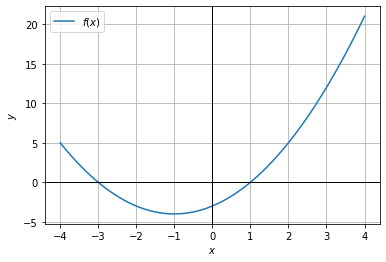

In [38]:
def f(x):
    return x**2 + 2*x - 3
    
xwaarden=np.linspace(-4,4,100)

plt.plot(xwaarden,f(xwaarden),label='$f(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(y=0, linewidth=1, color='k')
plt.axvline(x=0, linewidth=1, color='k')
plt.grid()
plt.legend()
plt.show()

De *nulpunten* van een functie zijn die $x$ waarden waarvoor $y=0$. Om de nulpunten van een functie te kennen, stellen we dus $f(x)=0$, en lossen we deze vergelijking op voor waarden van $x$. In bovenstaand voorbeeld moeten we dus, om de nulpunten te vinden, $f(x) = x^2 + 2 x - 3 = 0$ oplossen. Je herinnert je misschien nog dat dit kan met behulp van de discriminant. Hier laten we Python ons helpen:

In [39]:
x = Symbol('x')
solve(x**2+2*x-3, x)

[-3, 1]

In bovenstaande figuur stellen we inderdaad vast dat de functie nul wordt wanneer $x=-3$ of wanneer $x=1$. Ga dit ook na door deze oplossingen in te vullen in $y= f(x) = x^2 + 2 x - 3$.

Functies zijn bijzonder waardevol, omdat ze ons de mogelijkheid geven om relaties tussen verschillende grootheden, die we na observatie en experiment in de realiteit hebben vastgesteld, wiskundig weer te geven. Dit geeft ons dan weer de mogelijk wiskundige technieken los te laten op deze relaties, die ons nieuwe inzichten kunnen geven over de onderliggende realiteit.

In dit hoofdstuk introduceren we enkele bijzondere functies, en geven we ook enkele voorbeelden uit de realiteit mee.


## T1.2- Lineaire functies

### T1.2.1 - De richtingscoëfficiënt en het intercept

*Lineaire functies*, ook *eerstegraadsfuncties* genoemd, zijn functies van de vorm

$$
y = ax+b,
$$

met $a$ en $b$ constante waarden, die respectievelijk de *richtingscoëfficiënt* en het *intercept* genoemd worden. Men behulp van onderstaande interactieve figuur proberen we vertrouwd te raken met de betekenis van richtingscoëfficiënt en intercept.

In [133]:
xwaarden=np.linspace(-4,4,100)


    
def animatie(a,b):
    
    def f(x):
        return a*x+b
    
    plt.plot(xwaarden,f(xwaarden),label=r'$f(x)={}x+{}$'.format(a,b))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.ylim([-4,4])
    plt.legend(loc='upper left')
    plt.axhline(y=0, linewidth=1, color='k')
    plt.axvline(x=0, linewidth=1, color='k')
    plt.grid()
    plt.show()

interact(animatie
        ,a=FloatSlider(min=-2, max=2, step=0.5, value=1, description='$a$')
        ,b=FloatSlider(min=-2, max=2, step=0.5, value=1, description='$b$'));

interactive(children=(FloatSlider(value=1.0, description='$a$', max=2.0, min=-2.0, step=0.5), FloatSlider(valu…

* Functies van de vorm $y=f(x)=ax+b$ worden lineaire functies genoemd, hun grafiek is een rechte lijn.
* Welke waarde neemt $y$ aan wanneer $x=0$?
* Hoe verandert de waarde van de afhankelijke veranderlijke $y$, als we de waarde van de onafhankelijke veranderlijke $x$ met één eenheid vergroten?

Op basis van de figuur stellen we vast dat wanneer $x=0$, $y$ de waarde van het intercept, $b$, aanneemt. Dit zien we ook in op basis van de uitdrukking van de functie die hier wordt afgebeeld. Wanneer we vragen welke waarde $y$ aanneemt wanneer $x=0$, substitueren we $x=0$ in $y=ax+b$, om inderdaad tot $y=a\times0+b=b$ te komen.

Na wat visueel onderzoek zien we dat, wanneer de waarde van $x$ met één wordt vergroot, de waarde van $y$ precies $a$ groter wordt. Een verandering van de waarde van de onafhankelijke veranderlijke kan een verandering van de waarde van de afhankelijke veranderlijke veroorzaken. De richtingscoëfficiënt is gedefinieerd als de verhouding van deze veranderingen. 

Laten we wiskundig nagaan dat de richtingscoëfficiënt voor onze lineaire functie $y=f(x)=ax+b$ inderdaad $a$ is. Wanneer we de waarde voor $y$ opvragen bij een waarde $x=x_1$, dan vinden we $f(x_1)=ax_1+b$. Laten we nu de waarde voor $y$ opvragen bij een waarde die $c$ eenheden verderop ligt, $x=x_1+c$, dan vinden we $f(x_1+c)=a(x_1+c)+b = a x_1 + a c + b$. We hebben nu gesteld dat de richtingscoëfficiënt gedefinieerd is als de verhouding tussen de verandering in afhankelijke veranderlijke, ten opzichte van de verandering in onafhankelijke veranderlijke. We vinden dan de waarde van de richtingscoëfficiënt via

$$
\dfrac{f(x_1+c)-f(x_1)}{(x_1+c)-x_1}=\dfrac{(a x_1 + a c + b)-(a x_1+b)}{(x_1+c)-x_1} = \dfrac{a c}{c}=a,
$$

en stellen dus vast dat we $a$ in een lineaire functie inderdaad de richtingscoëfficiënt mogen noemen. Deze richtingscoëfficiënt is een maat voor de helling van de lineaire functie.

### T1.2.2 - Het nulpunt

Het nulpunt van de lineaire functie vinden we door te vragen voor welke $x$-waarde $y=f(x)=ax+b=0$ opgaat. We vinden

$$
\begin{align}
 && ax+b&=0,\\
 &\Leftrightarrow & ax &= -b,\\
 &\Leftrightarrow & x &= -\dfrac{b}{a}.\\
\end{align}
$$

Ga op bovenstaande interactieve figuur na dat de waarde voor $y$ inderdaad nul wordt wanneer $x = -\dfrac{b}{a}$.

### T1.2.3 - Enkele voorbeelden

#### De temperatuurschalen

Om de temperatuur uitgedrukt in graden Celcius om te zetten naar de schaal van kelvin, vermeerderen we deze met $273.15$ eenheden. De relatie tussen graden Celcius, genoteerd als $T_C$, en kelvin, genoteerd als $T_K$, wordt dan gegeven door:

$$
T_K = T_C + 273.15.
$$

Om de temperatuur uitgedrukt in graden Celcius naar graden Fahrenheit om te zetten, moet met de graden Celcius met $\dfrac{9}{5}$ vermenigvuldigen, en het resultaat met $32$ vermeerderen. De relatie wordt dus gegeven door

$$
T_F = \dfrac{9}{5} T_C + 32,
$$

met $T_F$ de temperatuur in graden Fahrenheit.

* Welke variabelen zijn in bovenstaande twee uitdrukkingen de afhankelijke, en welke de onafhankelijke?

De kelvin en fahrenheit schaal worden in functie van het aantal graden Celcius uitgezet in onderstaande figuur.

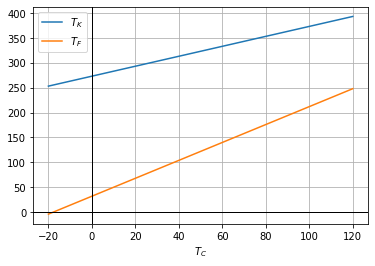

In [42]:
def TK(TC):
    return TC + 273.15

def TF(TC):
    return 9/5*TC + 32
    
TCwaarden=np.linspace(-20,120,100)

plt.plot(TCwaarden,TK(TCwaarden),label='$T_K$')
plt.plot(TCwaarden,TF(TCwaarden),label='$T_F$')
plt.xlabel('$T_C$')
plt.axhline(y=0, linewidth=1, color='k')
plt.axvline(x=0, linewidth=1, color='k')
plt.grid()
plt.legend()
plt.show()

* Bij hoeveel graden Celcius is het nul graden Fahrenheit?

#### De fietser

Een fietser vertrekt thuis, en nadat ze twee kilometer heeft afgelegd, houdt ze plots een constante snelheid, $v\,\left[\text{km}\,\text{h}^{-1}\right]$, aan. Laat $t\,\left[\text{h}\right]$ de tijd noteren die verstreken is sinds ze de constante snelheid begon aan te houden, geef dan een uitdrukking voor de totale afstand die de fietser sinds haar vertrek thuis heeft afgelegd, $a$, in functie van de tijd, $t$.

De afgelegde afstand wordt gegeven door

$$
a = vt+2.
$$

Stel dat $v=20$, hoeveel afstand heeft de fietser dan afgelegd na $2$ uur?

### T1.2.4 - Een rechte door twee punten

Beschouw twee punten in een vlak, met respectievelijke coördinaten $(x_1,y_1)$ en $(x_2,y_2)$. Er is nu precies één rechte, met een vergelijking van de vorm $y=ax+b$, die door deze twee punten loopt. We wensen nu deze rechte te bepalen, door $a$ en $b$ te vinden.

Omdat $(x_1,y_1)$ op de rechte ligt, moet  $y_1=ax_1+b$ waar zijn, en omdat $(x_2,y_2)$ op de rechte ligt, moet $y_2=ax_2+b$ waar zijn. Op basis van dit stelsel vinden we:

$$
\begin{cases}
      y_1&=ax_1+b \\
      y_2&=ax_2+b
\end{cases} \Leftrightarrow
\begin{cases}
      y_1-ax_1&=b \\
      y_2-ax_2&=b
\end{cases} \Leftrightarrow
\begin{cases}
      y_1-ax_1&=b \\
      y_2-ax_2&=y_1-ax_1
\end{cases} \Leftrightarrow
\begin{cases}
      y_1-ax_1&=b \\
      \dfrac{y_2-y_1}{x_2-x_1}&=a
\end{cases} \Leftrightarrow
\begin{cases}
      y_1-\dfrac{y_2-y_1}{x_2-x_1}x_1&=b \\
      \dfrac{y_2-y_1}{x_2-x_1}&=a
\end{cases} 
$$

We hebben dus nu (eerder ingewikkelde) waarden voor de richtingscoëfficiënt en het intercept gevonden. Substitueren in $y=ax+b$ en vereenvoudigen levert een vorm op die je misschien herkent! 

Inderdaad, de vergelijking van een rechte die door de punten $(x_1,y_1)$ en $(x_2,y_2)$ loopt, wordt gegeven door 

$$
y -y_1 = \dfrac{y_2-y_1}{x_2-x_1} \left( x - x_1 \right) ,
$$

met $\dfrac{y_2-y_1}{x_2-x_1}$ de richtingscoëfficiënt.

In [136]:
xwaarden=np.linspace(-4,4,100)


    
def animatie(x1,x2,y1,y2):
    
    def f(x):
        return (y2-y1)/(x2-x1)*(x-x1)+y1
    
    plt.plot(xwaarden,f(xwaarden),label=r'$y-{2}=\dfrac{{{3}-{2}}}{{{1}-{0}}}(x-{0})$'.format(x1,x2,y1,y2))
    plt.plot([x1], [y1], 'g',marker='o')
    plt.plot([x2], [y2], 'g',marker='o')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.ylim([-4,4])
    plt.legend(loc='upper left')
    plt.axhline(y=0, linewidth=1, color='k')
    plt.axvline(x=0, linewidth=1, color='k')
    plt.grid()
    plt.show()

interact(animatie
        ,x1=FloatSlider(min=-4, max=4, step=1, value=2, description='$x_1$')
        ,y1=FloatSlider(min=-4, max=4, step=1, value=1, description='$y_1$')
        ,x2=FloatSlider(min=-4, max=4, step=1, value=-1, description='$x_2$')
        ,y2=FloatSlider(min=-4, max=4, step=1, value=-3, description='$y_2$'));

interactive(children=(FloatSlider(value=2.0, description='$x_1$', max=4.0, min=-4.0, step=1.0), FloatSlider(va…

## T1.3- Veeltermfuncties

Naast eerstegraadsfuncties kunnen we ook *tweedegraads-*, *derdegraads-*, of *n-de graadsfuncties* bedenken, die respectievelijk als $y=a_2 x^2+a_1 x + a_0$, $y=a_3 x^3 + a_2 x^2+a_1 x + a_0$ en $y=a_n x^n + a_{n-1} x^{n-1} + \dots + a_2 x^2+a_1 x + a_0$ kunnen worden genoteerd, met $a_1, a_2, \dots, a_n$ constanten. Deze kunnen gebruikt worden wanneer de waarde van de afhankelijke veranderlijke, $y$, op een niet-lineaire manier gerelateerd is aan de waarde van de onafhankelijke veranderlijke, $x$.

We kunnen dezelfde technieken als voor eerstegraadsfuncties toepassen om deze hogere graadsfuncties te bestuderen. We illustreren dit aan de hand van een aantal voorbeelden.

### T1.3.1- Enkele voorbeelden

#### Vrije val

We laten een voorwerp vallen vanop hoogte $x_0\,\left[\text{m}\right]$. We kunnen ons inbeelden dat het voorwerp aan lage snelheid begint te vallen, en steeds aan snelheid wint, en dus steeds sneller aan hoogte inboet. Inderdaad, in [Hoofdstuk 4](./H4-KlassiekeMechanica.ipynb) zien we dat de hoogte $x\,\left[\text{m}\right]$ van het vallend voorwerp in functie van de tijd, $t\,\left[\text{s}\right]$, gegeven wordt door

$$
x = x_0 - \dfrac{g}{2}t^2,
$$

met $g = 9.81 \,\text{m}\text{s}^{-2}$ de valversnelling. Wat is hier de onafhankelijke veranderlijke, en wat de afhankelijke?

De hoogte van het voorwerp wordt in onderstaande figuur uitgezet tegen de tijd, als $x_0=30\,\text{m}$.

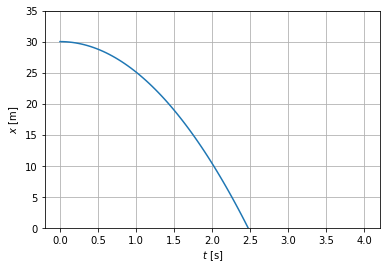

In [46]:
x0=30
g=9.81

twaarden=np.linspace(0,4,100)

def x(t):
    return x0-g/2*t**2
    
plt.plot(twaarden,x(twaarden))

plt.xlabel('$t$ [s]')
plt.ylabel('$x$ [m]')
plt.ylim([0,35])
plt.grid()
plt.show()

* Op welke hoogte bevindt het voorwerp zich na 2 seconden?
* Op welk tijdstip wordt de hoogte gelijk aan nul?

We vinden de hoogte door $t=2$ te substitueren in de relatie $x  = x_0 - \dfrac{g}{2}t^2$:

$$
x  = x_0 - \dfrac{g}{2}t^2 = 30 - \dfrac{9.81}{2}2^2,
$$

wat we door Python kunnen laten uitrekenen:

In [47]:
30-9.81/2*2**2

10.379999999999999

Ga na of dit inderdaad overeenkomt met bovenstaande figuur.

In de tweede vraag wordt gevraagd op welk tijdstip de hoogte gelijk aan nul wordt. We moeten dus die $t$ vinden, waarvoor

$$
x  = x_0 - \dfrac{g}{2}t^2 = 30 - \dfrac{9.81}{2} t^2= 0
$$

geldt. Merk op dat dit hetzelfde is als het nulpunt berekenen voor deze functie. Met Python vinden we:

In [48]:
t = Symbol('t')
solve(30-9.81/2*t**2, t)

[-2.47309683414749, 2.47309683414749]

De vergelijking heeft twee oplossingen, waarvan er maar één een positieve tijd voorstelt, en dus zinvol is. Het voorwerp heeft hoogte nul op tijdstip $t = 2.473$.

#### Volume van een bol

Het volume, $V\,\left[\text{m}^3\right]$ van een bol wordt gegeven door

$$
V = \dfrac{4}{3}\pi r^3,
$$

met $r\,\left[\text{m}\right]$ de straal. Bovenstaande functie geeft dus de relatie weer tussen het volume en de straal van een bol.

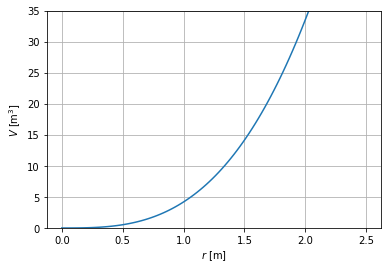

In [50]:
rwaarden=np.linspace(0,2.5,100)

def V(r):
    return 4/3*np.pi*r**3
    
plt.plot(rwaarden,V(rwaarden))

plt.xlabel('$r$ [m]')
plt.ylabel('$V$ [m$^3$]')
plt.ylim([0,35])
plt.grid()
plt.show()

* Welke straal heeft een bol van volume $V=15$?

We vragen voor welke waarde van $r$ de vergelijking

$$
V = \dfrac{4}{3}\pi r^3 = 15
$$

opgaat. Daar

$$
\begin{align}
&& \dfrac{4}{3}\pi r^3 &= 15\\
&\Leftrightarrow \dfrac{4}{3}\pi r^3 -15 &= 0
\end{align}
$$

Dit is equivalent aan het nulpunt berekenen van de functie $f(r) = \dfrac{4}{3}\pi r^3 -15$

In [51]:
r = Symbol('r')
solve(4/3*np.pi*r**3-15, r)

[1.52991587097293,
 -0.764957935486467 - 1.32494600991556*I,
 -0.764957935486467 + 1.32494600991556*I]

We vinden drie oplossingen, waarvan er twee *imaginair* zijn. In een imaginair getal komt $i$ voor. We gaan in deze cursus niet in op de imaginaire getallen, het volstaat ons hier te realiseren dat deze imaginaire getallen geen stralen kunnen voorstellen, en deze oplossingen dus kunnen worden uitgesloten. Een bol van volume $V=15$ heeft een straal $r=1.530$.

## T1.4- Exponentiële functies

Een exponentiële functie is een functie van de vorm

$$
y=a^x,
$$

met $a$ een constante die men het *grondtal* noemt, $y$ de afhankelijke veranderlijke, en $x$ de onafhankelijke veranderlijke. Merk het verschil op met de veeltermfuncties, waar onafhankelijke veranderlijke $x$ tot bepaalde constante machten verheven werd. Hier staat $x$ in de exponent!

Van bijzonder belang is de exponentiële functie waar het grondtal $a=e$ met $e=2.71828 \dots$ het getal van Euler,

$$
y=e^x\equiv \exp(x),
$$

waar $\exp(x)$ een alternatieve notatie is. Deze functie is onder meer van bijzonder belang omdat ze voorkomt in de oplossingen van vele [differentiaalvergelijkingen](./T5-Differentiaalvergelijkingen/T5-Differentiaalvergelijkingen.ipynb).

Laten we het verloop van de exponentiële functie onderzoeken, en ze eerst nog wat flexibeler maken een goed geplaatste constanten $c$ aan de exponent toe te voegen:

$$
y=e^{c x}\equiv \exp(c x).
$$

Deze functie wordt in onderstaande interactieve figuur weergegeven:

In [58]:
xwaarden=np.linspace(-4,4,100)


    
def animatie(c):
    
    def f(x):
        return np.exp(c*x)
    
    plt.plot(xwaarden,f(xwaarden),label=r'$f(x)=\exp ({}x)$'.format(c))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.ylim([0,10])
    plt.legend(loc='upper left')
    plt.axhline(y=0, linewidth=1, color='k')
    plt.axvline(x=0, linewidth=1, color='k')
    plt.grid()
    plt.show()

interact(animatie
        ,c=FloatSlider(min=-2, max=2, step=0.5, value=1, description='$c$'));

interactive(children=(FloatSlider(value=1.0, description='$c$', max=2.0, min=-2.0, step=0.5), Output()), _dom_…

* Merk de sterk stijgende trend op wanneer $c>0$. Hoe verklaar je die? Waarom wordt afhankelijke veranderlijke klein wanneer $x$ sterk negatief wordt?
* Precies het omgekeerde gebeurt wanneer $c>0$, hoe verklaar je dat?
* Welke waarde heeft $f(x)$ in $x=0$?
* Welke waarde heeft $f(x)$ wanneer $c=0$?
* Heeft deze exponentiële functie nulpunten?

### T1.4.1- Enkele voorbeelden

#### IV Bolus

In [Hoofdstuk 1](./H1-Farmacokinetiek.ipynb) zien we dat de plasmaconcentratie van een geneesmiddel, $c_p\,\left[\text{mol}\,\text{l}^{-1}\right]$, toegediend via IV bolus, gemodelleerd kan worden door

$$
		c_p = \dfrac{D}{V_d} e^{-k t},
$$
		
met $D\,\left[\text{mg}\right]$ de dosis, $V_d\,\left[\text{l}\right]$ het distributievolume,  $k\,\left[\text{h}^{-1}\right]$ de eliminatieconstante, en $t\,\left[\text{h}\right]$ de tijd na toediening van het geneesmiddel.

In [109]:
twaarden=np.linspace(0,4,100)

D=500
Vd=21
    
def animatie(k):
    
    def cp(t):
        return D/Vd*np.exp(-k*t)
    
    plt.plot(twaarden,cp(twaarden),label=r'$f(x)=D/V_d\exp (-{}x)$'.format(k))
    plt.xlabel('$t$ [h]')
    plt.ylabel('$c_p$ [mol l$^{-1}$]')
    plt.ylim([0,25])
    plt.legend()
    plt.axhline(y=0, linewidth=1, color='k')
    plt.axvline(x=0, linewidth=1, color='k')
    plt.grid()
    plt.show()

interact(animatie
        ,k=FloatSlider(min=0.2, max=1, step=0.2, value=0.6, description='$k$'));

interactive(children=(FloatSlider(value=0.6, description='$k$', max=1.0, min=0.2, step=0.2), Output()), _dom_c…

* Hoeveel bedraagt de plasmaconcentratie net na toediening van het geneesmiddel?
* Hoe lang duurt het eer al het geneesmiddel uit het plasma verwijderd is?

#### Populatiemodel

In [Hoofdstuk 3](./H3-Populatiemodellen.ipynb) zien we dat de evolutie van het aantal insecten, $N$, in een populatie kan evolueren volgens

$$
N = N(0)e^{rt},
$$

met $r\,[\text{d}^{-1}]$ de intrinsieke groeisnelheid en $N(0)$ het aantal insecten op tijdstip nul.

In [112]:
twaarden=np.linspace(0,35,100)

N0=10
    
def animatie(r):
    
    def N(t):
        return N0*np.exp(r*t)
    
    plt.plot(twaarden,N(twaarden),label=r'$f(x)=N_0 \exp ({}x)$'.format(r))
    plt.xlabel('$t$ [d]')
    plt.ylabel('$N$')
    plt.ylim([0,200])
    plt.legend(loc='upper left')
    plt.axhline(y=0, linewidth=1, color='k')
    plt.axvline(x=0, linewidth=1, color='k')
    plt.grid()
    plt.show()

interact(animatie
        ,r=FloatSlider(min=0.01, max=0.1, step=0.01, value=0.08, description='$r$'));

interactive(children=(FloatSlider(value=0.08, description='$r$', max=0.1, min=0.01, step=0.01), Output()), _do…

### Eigenschappen?

## T1.5- Logaritmische functies

### T1.5.1- De logaritme

Zoals aftrekken het omgekeerde van optellen bewerkstelligt, en delen het omgekeerde van vermenigvuldigen, doet een logaritme het omgekeerde van een macht. 

Stel dat we ons, in het geval van delen en vermenigvuldigen, met een getal $a$ geconfronteerd zien, en we wensen te weten met welk getal we $a$ moeten vermenigvuldigen om het getal $b$ te bekomen. We vinden het antwoord op deze vraag via de bewerking

$$
\dfrac{b}{a}.
$$

Inderdaad, stel dat de deling van $b$ door $a$ een getal $r$ oplevert, dan weten we dat de vermenigvuldiging van $a$ met $r$ in $b$ resulteert, en onze vraag is beantwoord:

$$
\dfrac{b}{a} = r \Leftrightarrow ar=b.
$$

Stel nu, in het geval van logaritmes en machten, dat we ons met een nieuw getal $a$ geconfronteerd zien, en we wensen te weten tot welke macht we $a$ moeten verheffen om een getal $b$ te bekomen. We vinden het antwoord door de bewerking

$$
\log_{a} (b),
$$

en we zeggen dat we hier het logaritme met *grondtal* $a$ nemen van het getal $b$. Het logaritme is zo gedefinieerd dat

$$
\log_{a} (b) = r \Leftrightarrow a^r=b,
$$

of dus wanneer we $\log_{a} (b)$ nemen, zoeken we die macht waartoe we $a$ moeten verheffen om $b$ te bekomen.

Enkele illustraties:

* $\log_3 (9) = \log_3 (3^2) =2$
* $\log_{10} (1000) = \log_{10} (10^3) =3$
* $\log_4 \left(\dfrac{1}{4}\right) = \log_4 \left(4^{-1}\right) =-1$
* $\log_5 (1) = 0$

### T1.5.2- Eigenschappen, rekenregels en bijzondere logaritmen

Uit de definitie van de logaritme volgen:

$$
\boxed{\log_a \left( a^x\right) = x}
$$

en

$$
\boxed{a^{\log_a \left( x\right)} = x}
$$

Voorts geven we ook nog volgende rekenregels mee:

* $$
\boxed{\log_a \left(x y \right) = \log_a \left(x \right)+ \log_a \left(y \right)}
$$

* $$
\boxed{\log_a \left(\dfrac{x}{y} \right) = \log_a \left(x \right)- \log_a \left(y \right)}
$$

* $$
\boxed{\log_a \left(\dfrac{1}{y} \right) = - \log_a \left(y \right)}
$$

* $$
\boxed{\log_a \left(x^s \right) = s \log_a \left(x \right)}
$$

Er zijn twee logaritmen die bijzonder veel gebruikt worden, en daarom hun eigen notatie verdienen:
* Het logaritme met grondtal 10 wordt ook het *Briggse logaritme* genoemd, en wordt ook genoteerd als $\log(x)$, dus zonder grondtal.
* Het logaritme met $e$, het getal van Euler als grondtal, wordt het *natuurlijk logaritme* genoemd, genoteerd als $\ln(x)$.


### T1.5.3- De logaritmische functie

We kunnen nu een logaritmische functie definiëren, 

$$
y = \log_a (x),
$$

waar afhankelijke veranderlijke $y$ telkens de macht is waartoe men constante $a$ moet verheffen om aan onafhankelijke veranderlijke $x$ te komen. In onderstaande figuur worden $\ln (x) \equiv \log_e (x)$ en $\log (x) \equiv \log_{10} (x)$ geïllustreerd.

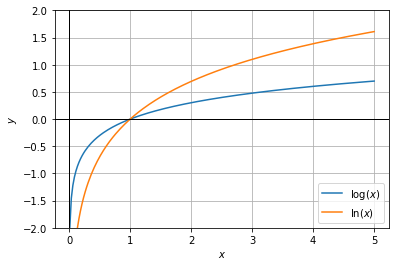

In [81]:
xwaarden=np.linspace(0.01,5,200)


# Merk op dat Python er helaas een andere conventie op nahoudt dan in onze regionen gewoonlijk is!
# Met behulp van de Python functie np.log10(x) berekent men wat wij als log(x) noteren
# Met behulp van de Python functie np.log(x) berekent men wat wij als ln(x) noteren
plt.plot(xwaarden,np.log10(xwaarden),label='$\log (x)$')
plt.plot(xwaarden,np.log(xwaarden),label='$\ln (x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim([-2,2])
plt.legend()
plt.axhline(y=0, linewidth=1, color='k')
plt.axvline(x=0, linewidth=1, color='k')
plt.grid()
plt.show()

* Waarom neemt $\ln(x)$ steeds grotere waarden aan dan $\log(x)$ wanneer $x>1$, en kleinere wanneer $x<1$?
* Wat gebeurt er wanneer $x$ naar nul toe gaat?
* Waar ligt het nulpunt van deze functies?

#### Exponentiële functies herschalen

In de sectie over exponentiële functies, zagen we dat de evolutie van het aantal insecten, $N$, in een populatie kan evolueren volgens

$$
N = N(0)e^{rt},
$$

met $r\,[\text{d}^{-1}]$ de intrinsieke groeisnelheid en $N(0)$ het aantal insecten op tijdstip nul. We produceerden een figuur die de populatiegrootte uitzet tegen de tijd, en stelden vast dat de populatiegrootte, zoals het een exponentiële functie betaamt, plots grote proporties kan aannemen. Ook hier kan het interessant zijn gebruik te maken van logaritmen, om de grootte van de getallen in te tomen.

Laten we de natuurlijke logaritme nemen van linker- en rechterlid in $N = N(0)e^{rt}$, en kijken wat er gebeurt:

$$
\begin{align}
&&  N &= N(0)e^{rt},\\
&\Leftrightarrow &  \ln \left( N \right) &= \ln \left( N(0)e^{rt}\right) ,\\
&\Leftrightarrow &  \ln \left( N \right) &= \ln \left( N(0)\right) + \ln \left( e^{rt}\right) ,\\
&\Leftrightarrow &  \ln \left( N \right) &= \ln \left( N(0)\right) + rt ,\\
\end{align}
$$

waar we in de tweede stap gebruikt maakten van de rekenregel $\log_a \left(x y \right) = \log_a \left(x \right)+ \log_a \left(y \right)$, en in de derde stap van $\log_a \left( a^x\right) = x$.

We stellen vast dat we door de natuurlijke logaritme te nemen van de uitdrukking $N = N(0)e^{rt}$, een lineair verband hebben gevonden tussen $\ln \left( N \right)$ en de tijd! Deze wordt in onderstaande figuur uitgezet, met $N(0) = 10$.

In [126]:
twaarden=np.linspace(0,70,100)

N0=10
    
def animatie(r):
    
    def N(t):
        return N0*np.exp(r*t)
    
    def lnN(t):
        return np.log(N0)+r*t

    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(twaarden,N(twaarden))
    ax2.plot(twaarden,lnN(twaarden))
       
    ax1.set_ylim(0,1000)
    ax1.grid()
    ax1.set_xlabel('$t$ [d]')
    ax1.set_ylabel('$N$')

    ax2.set_ylim(0,np.log(1000))
    ax2.grid()
    ax2.set_xlabel('$t$ [d]')
    ax2.set_ylabel('$\ln (N)$')
    
    fig.tight_layout()

interact(animatie
        ,r=FloatSlider(min=0.01, max=0.1, step=0.01, value=0.08, description='$r$'));

interactive(children=(FloatSlider(value=0.08, description='$r$', max=0.1, min=0.01, step=0.01), Output()), _do…

#### Logaritmische schaal

In [131]:
twaarden=np.linspace(0,70,100)

N0=10
    
def animatie(r):
    
    def N(t):
        return N0*np.exp(r*t)

    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(twaarden,N(twaarden))
    ax2.plot(twaarden,N(twaarden))
       
    ax1.grid()
    ax1.set_xlabel('$t$ [d]')
    ax1.set_ylabel('$N$')

    
    ax2.grid()
    ax2.set_yscale('log')
    ax2.set_xlabel('$t$ [d]')
    ax2.set_ylabel('$N$')
    
    fig.tight_layout()

interact(animatie
        ,r=FloatSlider(min=0.01, max=0.1, step=0.01, value=0.08, description='$r$'));



interactive(children=(FloatSlider(value=0.08, description='$r$', max=0.1, min=0.01, step=0.01), Output()), _do…

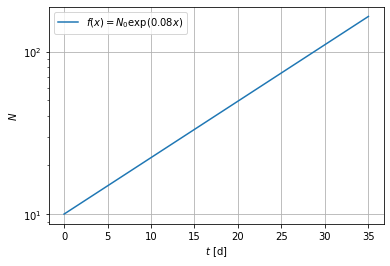

In [125]:
twaarden=np.linspace(0,35,100)

N0=10
    
r=0.08
    
def N(t):
    return N0*np.exp(r*t)
    
plt.plot(twaarden,N(twaarden),label=r'$f(x)=N_0 \exp ({}x)$'.format(r))
plt.xlabel('$t$ [d]')
plt.ylabel('$N$')
plt.legend(loc='upper left')
plt.yscale('log')
plt.grid()
plt.show()



### T1.5.4- Enkele voorbeelden

$$
\require{mhchem}
$$
De zuurtegraad van een waterige oplossing wordt bepaald door de concentratie hydroxonium-ionen, $\left[\ce{H3O+}\right]\,\left[\text{mol}\text{l}^{-1}\right]$, in de oplossing. Wanneer men een zuur aan zuiver water toevoegt, zal dit zuur namelijk geneigd zijn haar waterstofion, $\ce{H+}$, aan het aanwezige water, $\ce{H2O}$, af te staan, om $\ce{H3O+}$ te vormen. Een base doet precies het tegenovergestelde, en zal geneigd zijn waterstofionen op te nemen. Wanneer we zuur, base, of een combinatie van beide aan water toevoegen, vertelt de concentratie $\left[\ce{H3O+}\right]$ hoe zuur de resulterende waterige oplossing is. Indien de concentratie $\left[\ce{H3O+}\right]$ hoog is, is de oplossing zuur, en wanneer ze laag is, is de oplossing basisch.

In citroensap, dat kan opgevat worden als water waarin citroenzuur zit opgelost, is de concentratie $\left[\ce{H3O+}\right] = 10^{-2}$, in zuiver water is dat $\left[\ce{H3O+}\right] = 10^{-7}$, terwijl in huishoudammonia, een waterige oplossing van de base ammoniak ($\ce{NH3}$) die als vetverwijderaar wordt ingezet, dat $\left[\ce{H3O+}\right] = 10^{-11.5}$ is. Men stelt vast dat er zelfs tussen deze veel voorkomende huis-tuin-en-keukenmiddelen enorme verschillen bestaan: er zit een miljard keer meer $\ce{H3O+}$ in citroensap dan in huishoudammonia!

Omdat werken met dergelijke getallen niet handig is, kiest men er vaak voor gebruik te maken van de pH-schaal. Deze is ook gebaseerd op de concentratie $\left[\ce{H3O+}\right]$, maar voegt er nog een logaritmische bewerking aan toe, om zodoende van de erg kleine getallen af te raken:

$$
\text{pH} = -\log(\left[\ce{H3O+}\right]).
$$

We kunnen de pH van citroensap dus eenvoudig berekenen als:

$$
\text{pH} = -\log(10^{-2}) = 2,
$$

terwijl de pH van zuiver water en ammoniak respectievelijk gegeven wordt door $7$ en $11.5$. Merk wel op dat een lage pH op hoge $\left[\ce{H3O+}\right]$ en dus een zure oplossing wijst! Onderstaande figuur geeft de pH weer in functie van $\left[\ce{H3O+}\right]$.

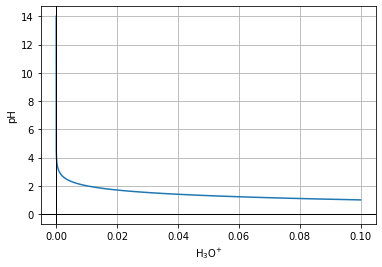

In [108]:
concwaarden=10**np.linspace((-14),(-1),200)

plt.plot(concwaarden,-np.log10(concwaarden))
plt.xlabel('H$_3$O$^{+}$')
plt.ylabel('pH')
plt.axhline(y=0, linewidth=1, color='k')
plt.axvline(x=0, linewidth=1, color='k')
plt.grid()
plt.show()

* Hoe relateer je deze figuur aan die van $y=\log(x)$ enkele paragrafen terug?
* De figuur ziet er niet zo interessant uit; waar vinden we de $\left[\ce{H3O+}\right]$ geassocieerd men citroensap, zuiver water, of huishoudammonia? 

Men voelt hier onmiddellijk aan waarom het gebruik van logaritmische herschalingen interessant is wanneer men getallen wil vergelijken die extreem van elkaar verschillen. Citroensap, zuiver water en huishoudammonia vallen op de $x$-as nauwelijks van elkaar te onderscheiden, maar worden op de $y$-as netjes los van elkaar geprojecteerd.

## T1.6- Goniometrische functies

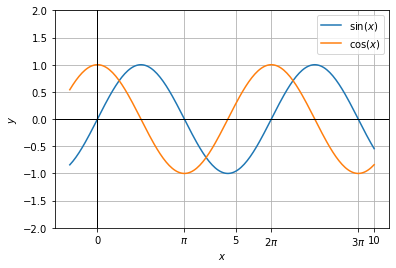

In [99]:
xwaarden=np.linspace(-1,10,200)

   
plt.plot(xwaarden,np.sin(xwaarden),label='$\sin (x)$')
plt.plot(xwaarden,np.cos(xwaarden),label='$\cos (x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim([-2,2])
plt.legend()
plt.axhline(y=0, linewidth=1, color='k')
plt.axvline(x=0, linewidth=1, color='k')
plt.grid()
plt.xticks([0,np.pi,5,2*np.pi,3*np.pi,10],[0,r'$\pi$',5,r'$2 \pi$',r'$3 \pi$',10])
plt.show()

In [84]:
np.pi

3.141592653589793

 ## Referentie
 
 De tekst van dit hoofdstuk is deels gebaseerd op https://set.kuleuven.be/voorkennis/zomercursus/zomercursusZ